In [1]:
import pandas as pd
import matplotlib.pyplot as plt


comm = ['Send', 'Recv', 'Sendrecv_replace']
io = ['File_open', 'File_close', 'File_read_at', 'File_write_at']
barrier = ['Barrier']

In [2]:
df = pd.read_csv(f"40_8/callsite_time.csv")
comm_time = df[df['Name'].isin(comm)].groupby("Rank")['Max'].sum() / 1000
io_time = df[df['Name'].isin(io)].groupby("Rank")['Max'].sum() / 1000

In [3]:
df = pd.read_csv(f"40_8/mpi_time.csv")
cpu_time = df['AppTime'] - df['MPITime']

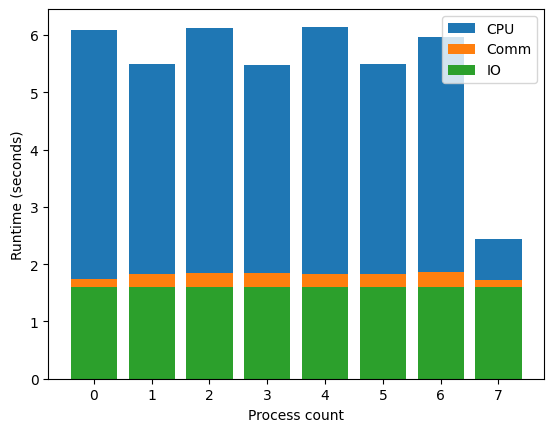

In [4]:
x = list(range(8))

plt.bar(x, cpu_time, label="CPU", bottom=comm_time.add(io_time))
plt.bar(x, comm_time.values, label="Comm", bottom=io_time)
plt.bar(x, io_time.values, label="IO")
plt.legend(loc='upper right')
plt.xlabel('Process count')
plt.ylabel('Runtime (seconds)')
plt.show()

In [5]:
proc_cnt = [8, 16, 32]

comm_time = []
io_time = []
for i in proc_cnt:
    df = pd.read_csv(f"{i}_{i}/aggregate_time.csv")
    comm_time.append(df[df['Call'].isin(comm)]['Time'].sum() / 1000 / i)
    io_time.append(df[df['Call'].isin(io)]['Time'].sum() / 1000 / i)

cpu_time = []
for i in proc_cnt:
    df = pd.read_csv(f"{i}_{i}/mpi_time.csv")
    cpu_time.append((df['AppTime'] - df['MPITime']).max())

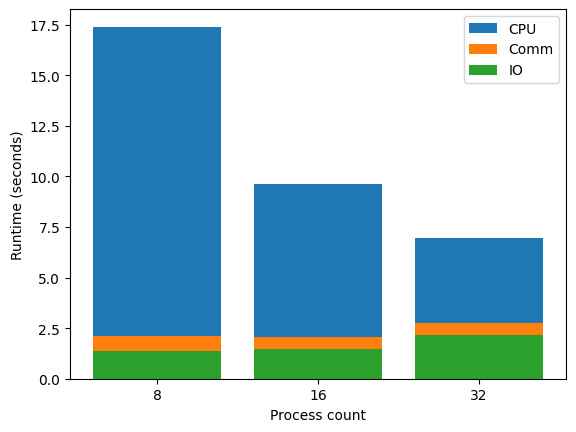

In [6]:
x = list(range(3))

plt.bar(x, cpu_time, label="CPU", bottom=[comm_time[i]+io_time[i] for i in range(3)])
plt.bar(x, comm_time, label="Comm", bottom=io_time)
plt.bar(x, io_time, label="IO")
plt.legend(loc='upper right')
plt.xlabel('Process count')
plt.ylabel('Runtime (seconds)')
plt.xticks(x, proc_cnt)
plt.show()

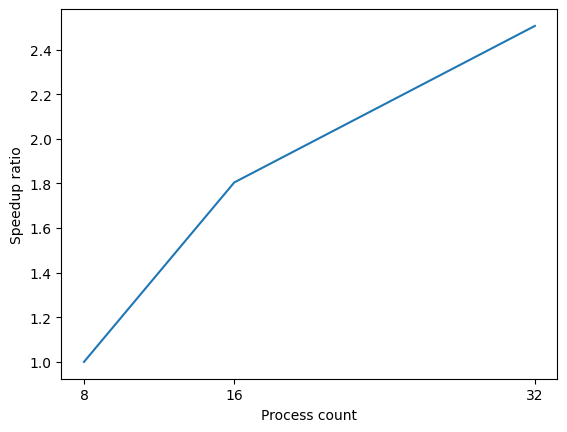

In [7]:
init_time = cpu_time[0]+comm_time[0]+io_time[0]
ratio = []
for i in range(3):
    ratio.append(init_time / (cpu_time[i]+comm_time[i]+io_time[i]))
plt.plot(proc_cnt, ratio)
plt.xlabel('Process count')
plt.ylabel('Speedup ratio')
plt.xticks(proc_cnt, proc_cnt)
plt.show()